In [70]:
#load the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('bmh')

In [71]:
style.use('ggplot')

In [72]:
#Load the data and store the data into a dataframe
df = pd.read_csv('TSLA.csv')

In [73]:
print(df.head(25))

          Date       Open       High        Low      Close  Adj Close  \
0   2016-08-16  45.098000  45.438000  44.681999  44.722000  44.722000   
1   2016-08-17  44.866001  44.966000  44.560001  44.647999  44.647999   
2   2016-08-18  44.764000  45.132000  44.458000  44.702000  44.702000   
3   2016-08-19  44.708000  45.034000  44.506001  45.000000  45.000000   
4   2016-08-22  44.834000  45.021999  44.535999  44.585999  44.585999   
5   2016-08-23  44.863998  45.698002  44.560001  44.967999  44.967999   
6   2016-08-24  45.410000  45.430000  44.444000  44.523998  44.523998   
7   2016-08-25  44.622002  44.759998  44.153999  44.192001  44.192001   
8   2016-08-26  44.428001  44.571999  43.764000  43.998001  43.998001   
9   2016-08-29  44.029999  44.080002  43.000000  43.040001  43.040001   
10  2016-08-30  43.222000  43.222000  42.104000  42.268002  42.268002   
11  2016-08-31  42.085999  42.520000  41.730000  42.402000  42.402000   
12  2016-09-01  41.801998  42.220001  40.099998  40

In [74]:
x = df[['High','Open','Low','Volume']].values
y = df['Close'].values

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [77]:
y_pred = regressor.predict(x_test)
result = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
result.head(25)

,Actual,Predicted
0,44.967999,45.360659
1,69.907997,68.172134
2,39.993999,40.441837
3,300.127991,302.884554
4,64.961998,64.678412
5,39.660000,40.095601
6,62.500000,62.994194
7,63.854000,62.682923
8,68.570000,67.807108
9,69.498001,68.490646


In [78]:
import math


In [79]:
graph = result.head(20)

<AxesSubplot:>

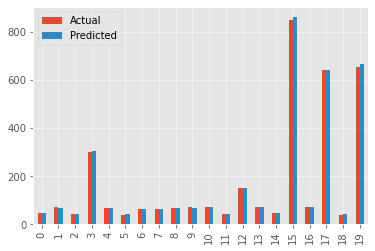

In [80]:
graph.plot(kind='bar')

In [81]:
#get the number of trading days
df.shape

(1258, 7)

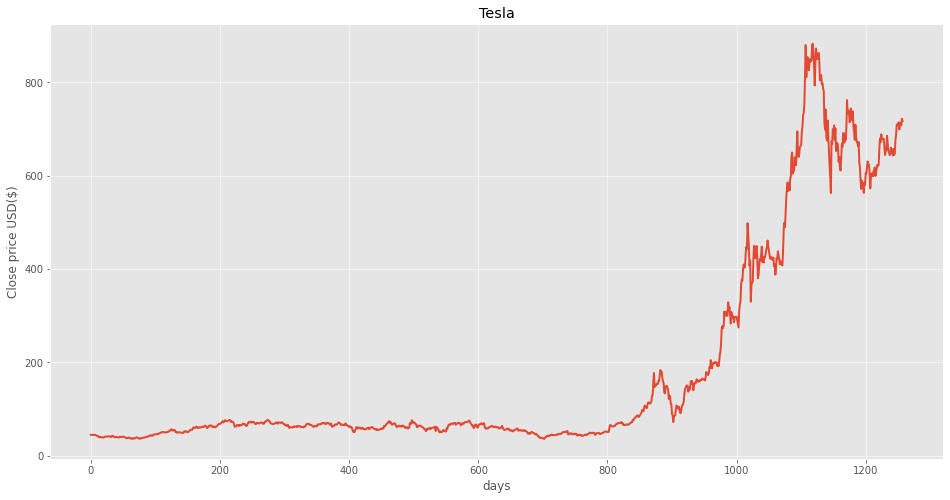

In [82]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('days')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.show()

In [83]:
#Create a variable to predict 'x' days out into the future
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,709.989990,13432300,NaN
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,707.820007,9800600,NaN
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,722.250000,17459100,NaN
1257,2021-08-13,723.710022,729.900024,714.340027,717.169983,717.169983,16698900,NaN


In [84]:
#Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[['2016-08-16' 45.098 45.438 ... 44.722 44.722 11335500]
 ['2016-08-17' 44.866001 44.966 ... 44.647999 44.647999 8935500]
 ['2016-08-18' 44.764 45.132 ... 44.702 44.702 8572500]
 ...
 ['2021-07-07' 664.27002 665.700012 ... 644.650024 644.650024 18792000]
 ['2021-07-08' 628.369995 654.429993 ... 652.809998 652.809998 22773300]
 ['2021-07-09' 653.179993 658.909973 ... 656.950012 656.950012 18140500]]


C:\Users\Gaurvi Vishnoi\AppData\Local\Temp\ipykernel_14848\2786909484.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['Prediction'],1))[:-future_days]


In [85]:
#Create the feature data set (y) and convert it to a numpy array and remove the last 'x' rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 41.043999  41.285999  41.490002 ... 707.820007 722.25     717.169983]


In [86]:
#Split the data into 80% training and 20% testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [87]:
#Get the last 'x' rows of feature data set
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

C:\Users\Gaurvi Vishnoi\AppData\Local\Temp\ipykernel_14848\2861461627.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=df.drop(['Prediction'],1)[:-future_days]


array([['2021-06-04', 579.710022, 600.609985, 577.200012, 599.049988,
        599.049988, 24036900],
       ['2021-06-07', 591.830017, 610.0, 582.880005, 605.130005,
        605.130005, 22543700],
       ['2021-06-08', 623.01001, 623.090027, 595.5, 603.590027,
        603.590027, 26053400],
       ['2021-06-09', 602.169983, 611.789978, 597.630005, 598.780029,
        598.780029, 16584600],
       ['2021-06-10', 603.880005, 616.590027, 600.5, 610.119995,
        610.119995, 23919600],
       ['2021-06-11', 610.22998, 612.559998, 601.52002, 609.890015,
        609.890015, 16205300],
       ['2021-06-14', 612.22998, 625.48999, 609.179993, 617.690002,
        617.690002, 20424000],
       ['2021-06-15', 616.690002, 616.789978, 598.22998, 599.359985,
        599.359985, 17764100],
       ['2021-06-16', 597.539978, 608.5, 593.5, 604.869995, 604.869995,
        22144100],
       ['2021-06-17', 601.890015, 621.469971, 601.340027, 616.599976,
        616.599976, 22701400],
       ['2021-06-18',

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1258 non-null   object 
 1   Open        1258 non-null   float64
 2   High        1258 non-null   float64
 3   Low         1258 non-null   float64
 4   Close       1258 non-null   float64
 5   Adj Close   1258 non-null   float64
 6   Volume      1258 non-null   int64  
 7   Prediction  1233 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB


<AxesSubplot:>

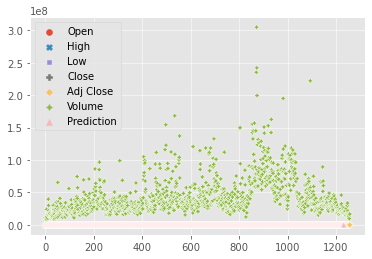

In [89]:
sns.scatterplot(data=df)

<AxesSubplot:xlabel='Close', ylabel='Prediction'>

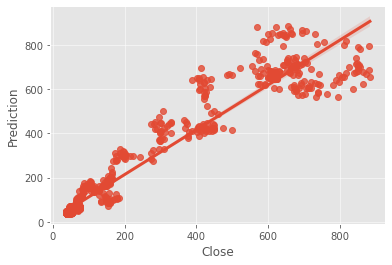

In [90]:
sns.regplot(x=df['Close'], y=df['Prediction'])

<AxesSubplot:xlabel='Close', ylabel='Prediction'>

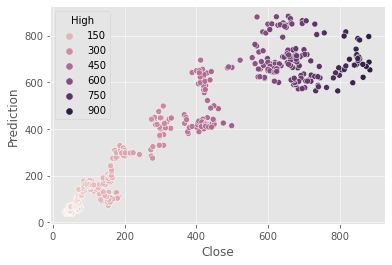

In [93]:
sns.scatterplot(x=df['Close'], y=df['Prediction'], hue=df['High'])

<AxesSubplot:ylabel='Close'>

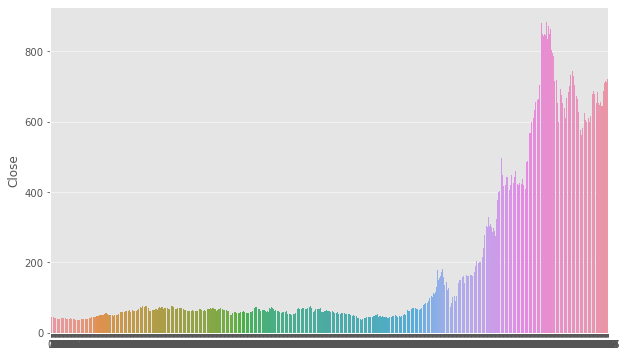

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y=df['Close'])
